<a href="https://colab.research.google.com/github/Raivotar/Alura-Bootcamp-Data-Science/blob/main/Projeto-2/Projeto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Usando os dados disponíveis no DataSus, comparar os dados divulgados de cobertura vacinal com as doses aplicadas / população.

# Imports e tratamento dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
from datetime import date

In [2]:
cobertura_ano = pd.read_csv("cobertura_ano.csv", sep=";", thousands=".", decimal=",", skiprows=0, skipfooter= 1,encoding="ISO-8859-1", engine="python")

In [3]:
cobertura_ano = cobertura_ano.set_index("Região")
cobertura_ano = cobertura_ano.drop(" Total", axis=1)
cobertura_ano

,2015,2016,2017,2018,2019
Região,,,,,
1 Região Norte,83.05,48.22,66.24,69.14,72.77
2 Região Nordeste,95.40,47.96,70.05,74.04,69.24
3 Região Sudeste,98.51,49.04,74.63,79.06,72.72
4 Região Sul,94.24,55.60,77.43,81.40,81.92
5 Região Centro-Oeste,94.42,60.87,76.14,81.87,78.18


In [4]:
doses_ano = pd.read_csv("doses_ano.csv", sep=";", thousands=".", decimal=",", skiprows=0, skipfooter= 1, encoding="ISO-8859-1", engine="python")

In [5]:
doses_ano = doses_ano.set_index("Região")
doses_ano = doses_ano.drop(" Total", axis=1)
doses_ano

,2015,2016,2017,2018,2019
Região,,,,,
1 Região Norte,5908687,5277111,4462184,4493242,4803829
2 Região Nordeste,17877921,14253705,12209631,12457787,11907449
3 Região Sudeste,25876716,21095974,18318038,18651485,17441511
4 Região Sul,8300237,7369548,6367798,6643600,6767702
5 Região Centro-Oeste,5061483,5194786,3874431,4025837,3967747


In [6]:
populacao = pd.read_csv("populacao.csv", sep=";", thousands=".", decimal=",", skipfooter= 1, skiprows=0,encoding="ISO-8859-1", engine="python")

In [7]:
populacao = populacao.set_index("Região")
populacao

,2015,2016,2017,2018,2019
Região,,,,,
1 Região Norte,17504446,17740418,17936201,18182253,18430980
2 Região Nordeste,56560081,56915936,57254159,56760780,57071654
3 Região Sudeste,85745520,86356952,86949714,87711946,88371433
4 Região Sul,29230180,29439773,29644948,29754036,29975984
5 Região Centro-Oeste,15442232,15660988,15875907,16085885,16297074


# Analise dos dados

In [8]:
dose_pop = populacao/doses_ano
dose_pop = dose_pop*100
dose_pop

,2015,2016,2017,2018,2019
Região,,,,,
1 Região Norte,296.249336,336.176707,401.960139,404.657773,383.672691
2 Região Nordeste,316.368335,399.306258,468.926203,455.624904,479.293709
3 Região Sudeste,331.361677,409.352761,474.667178,470.267896,506.673034
4 Região Sul,352.160788,399.478679,465.544730,447.860136,442.927067
5 Região Centro-Oeste,305.093033,301.475133,409.760995,399.566227,410.738739


**Analise inconclusiva:**
- O percentual de população vacinada está em aproximadamente 300%
- Visto que para algumas vacinas seja necessário mais de uma dose, não conseguimos fazer o comparativo.

# Nova Analise

Em consulta a biblioteca nacional de saúde, selecionamos uma vacina com dose única, sendo ela "BCG – ID" e selecionamos o ano de 2019 para fazer o comparativo. https://bvsms.saude.gov.br/vacinacao/

In [9]:
cobertura_todas = pd.read_csv("cobertura2019.csv", sep=";", thousands=".", decimal=",", skiprows=0, skipfooter= 0,encoding="ISO-8859-1", engine="python")
doses_todas = cobertura_todas.set_index("Região")

In [10]:
cobertura_selecionada = cobertura_todas["BCG"]
cobertura_selecionada

0    91.04
1    85.39
2    84.41
3    88.08
4    93.76
5    86.67
Name: BCG, dtype: float64

In [11]:
doses_todas = pd.read_csv("doses2019.csv", sep=";", thousands=".", decimal=",", skiprows=0, skipfooter= 0,encoding="ISO-8859-1", engine="python")
doses_todas = doses_todas.set_index("Região")

In [12]:
dose_selecionada = doses_todas["BCG"]
dose_selecionada

Região
1 Região Norte            284639
2 Região Nordeste         697160
3 Região Sudeste          972247
4 Região Sul              349941
5 Região Centro-Oeste     228857
Total                    2532844
Name: BCG, dtype: int64

Visto que a vacina BCG é aplicada em recém nascidos, fizemos a subtração da população de 2019 pela de 2018.

In [13]:
recem_nacidos = populacao["2019"] - populacao["2018"]

In [14]:
dose_sel_pop = dose_selecionada/recem_nacidos
dose_sel_pop*100

Região
1 Região Norte           114.438320
2 Região Nordeste        224.258060
3 Região Sudeste         147.424741
4 Região Sul             157.668012
5 Região Centro-Oeste    108.365966
Total                           NaN
dtype: float64

**Analise inconclusiva:**
- Mais uma vez obtivermos percentual acima de 100% de vacinados

**Considerações**
- Apesar da recomendação ser vacinar o recém nascido, a vacina BCG pode ser aplicada até os 15 anos de idade, desse modo entendemos que a estimativa da população vacinada por BCG  em 2019 ser a diferença de população entre 2019 e 2018 está errada.


# Plotagem dos dados
* Cobertura vacinal
* Doses aplicadas
* População
* Conclusão

<function matplotlib.pyplot.show>

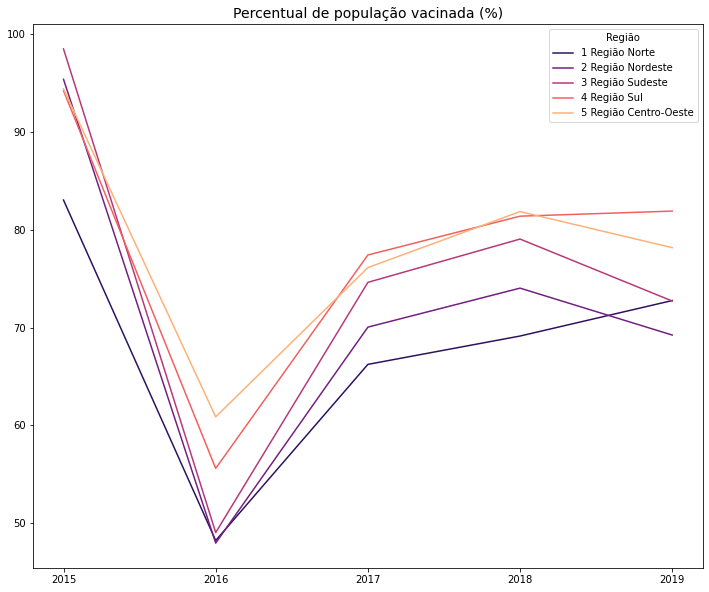

In [15]:
plt.figure(figsize=(12,10))
sns.lineplot(data=cobertura_ano.T, palette="magma", dashes=False)
plt.title("Percentual de população vacinada (%)", size=14)
plt.show

<function matplotlib.pyplot.show>

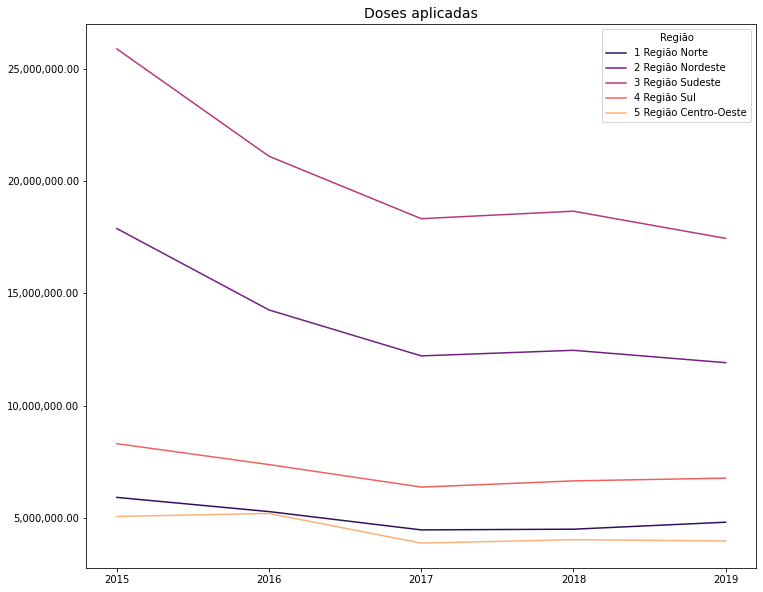

In [26]:
plt.figure(figsize=(12,10))
ax = sns.lineplot(data=doses_ano.T, palette="magma", dashes=False)
plt.title("Doses aplicadas", size=14)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.show

<function matplotlib.pyplot.show>

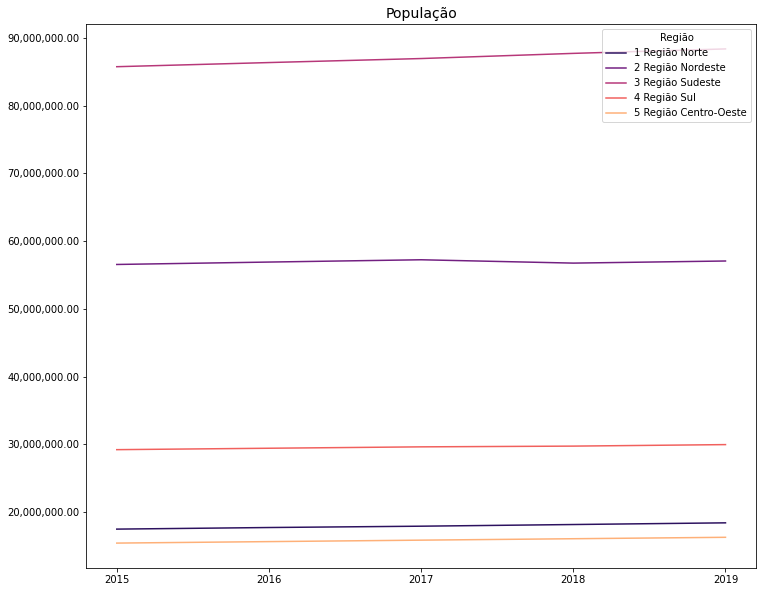

In [27]:
plt.figure(figsize=(12,10))
ax = sns.lineplot(data=populacao.T, palette="magma", dashes=False)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("População", size=14)
plt.show